In [90]:
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
%matplotlib inline

In [2]:
def data_grid(x, l, n = 100):
    dat = []
    if type(x) is float:
        x = [x]
    if type(l) is float or type(l) is int:
        l = [l]
    for x_ in x:
        dat_tmp = []
        for l_ in l:
            call(f'm.exe -x {x_} -l {l_} -n {n}')
            dat_tmp.append(np.fromfile('out.dat'))
        dat.append(dat_tmp)
    dat = np.array(dat).squeeze()
    if (dat.shape == (n,)):
        return dat.reshape((1, *dat.shape))
    else:
        return dat

In [34]:
alpha = np.linspace(2.8, 4, 1000)
data = data_grid(x = .5, l = alpha, n=100)

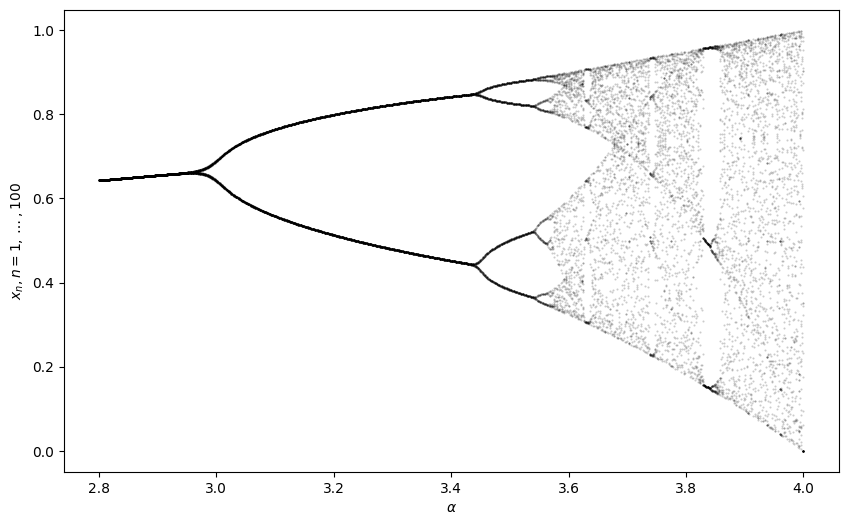

In [35]:
k = 20

plt.figure(figsize=(10,6))

for d, l in zip(data, alpha):
    plt.scatter(np.full(k, l), d[len(d) - k - 1: len(d) - 1], alpha=.2, s=1, c='black', marker='.')

plt.ylabel('$x_n, n = 1, \\dots, 100$')
plt.xlabel('$\\alpha$')
plt.show()

In [61]:
dx = 0.1
d = data_grid(x=np.linspace(dx, 1 - dx, 100), l=3.2)

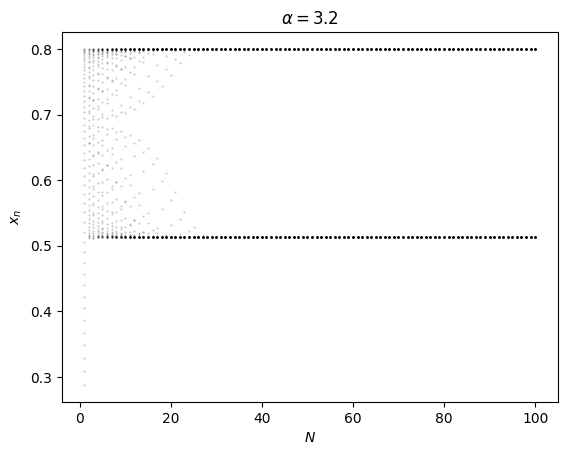

In [64]:
for d_ in d:
    plt.scatter(np.arange(len(d_)) + 1, d_, c='black', s=1, alpha=.1, marker='.')
plt.title('$\\alpha = 3.2$')
plt.ylabel('$x_n$')
plt.xlabel('$N$')
plt.show()

In [66]:
dx = 0.1
d = data_grid(x=np.linspace(dx, 1 - dx, 100), l=3.47, n=150)

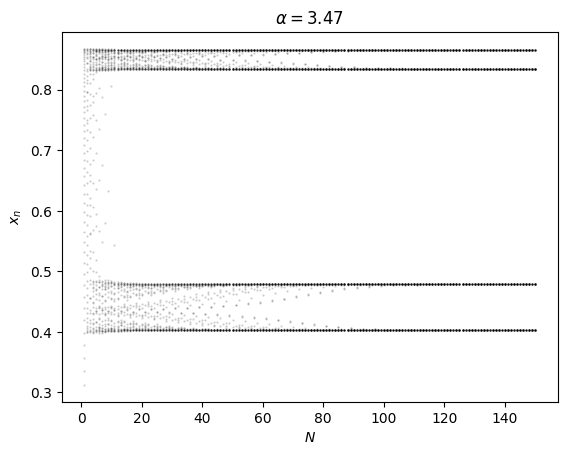

In [67]:
for d_ in d:
    plt.scatter(np.arange(len(d_)) + 1, d_, c='black', s=1, alpha=.1, marker='.')
plt.title('$\\alpha = 3.47$')
plt.ylabel('$x_n$')
plt.xlabel('$N$')
plt.show()

In [88]:
dx = 0.1
d = data_grid(x=np.linspace(dx, 1 - dx, 500), l=3.845, n=200)

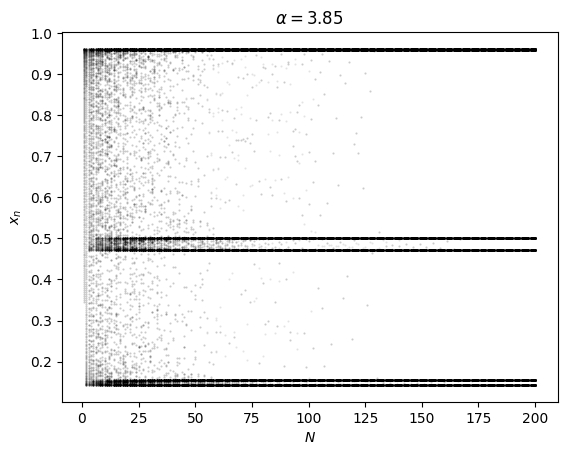

In [91]:
for d_ in d:
    plt.scatter(np.arange(len(d_)) + 1, d_, c='black', s=1, alpha=.1, marker='.')
plt.title('$\\alpha = 3.85$')
plt.ylabel('$x_n$')
plt.xlabel('$N$')
plt.show()

In [104]:
d = data_grid(x=.5, l=3.7, n=10_000_000)

In [117]:
np.histogram(d[0], bins=10000, density=True)[0].max()

72.4735808472121

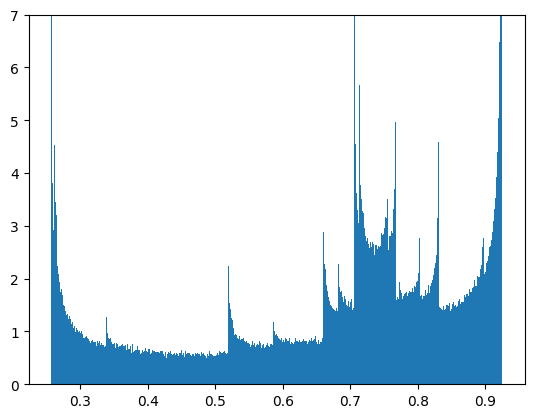

In [119]:
plt.hist(d[0], density=True, bins=10000)
plt.ylim((0,7))
plt.show()